### Set up

In [25]:
#Import modules

import pandas as pd
pd.options.display.max_columns = 99
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import dask.dataframe as dd
from dask.diagnostics import ProgressBar

# from numpy import arange, log10

from functions import chunk, agg, finalize
tunique = dd.Aggregation('tunique', chunk, agg,finalize)
first = dd.Aggregation('first', chunk, agg,finalize)

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

## Firm size info
### Arrange data

In [ ]:
# drive_path = './../../../../../../media/miglesia/Elements/export_france/data/type1/DP1610_MAASTRICHT1_1997_2013'

# colnames = [u'YEAR', u'MONTH', u'FLUX', u'ID', u'DEPT', u'CN ID 8', u'CPA6',
#        u'PYOD', u'PAYP', u'VAT', u'PRIFAC', u'DEVFAC', u'VFTE', u'VART', u'D_MASSE', u'MASSE', u'USUP', u'USUP_MT']

# colname_no = dict(zip(colnames, range(18)))
# # columns = [u'YEAR', u'MONTH', u'FLUX', u'ID', u'VART']
# columns = [u'YEAR', u'MONTH', u'FLUX', u'ID', u'CN ID 8', 'PYOD', 'VAT', u'VART']

# df_list = []

# for y in range(1997, 2006):
#     df_list += [dd.read_table(drive_path+'/DP1610_MAASTRICHT1_'+str(y)+'.txt', 
#             usecols = map(colname_no.get, columns),
#             delimiter = ';', header = None, dtype = {9: 'object'})]

# data = dd.concat(df_list)
# data.columns = columns
# data['IMPORT'] = data['FLUX'] % 2
# data['QUARTER'] = ((data['MONTH'] -1)// 3) + 1

# CN_full = pd.read_csv('./../data/CN_full.csv', encoding = 'utf-8')
# data = data.merge(CN_full[['CN ID 8', 'CN ID 4', 'CN label 4']])

# firm_sizes = data.groupby(['YEAR', 'IMPORT', 'ID']).agg({'VART': sum, 'VAT': tunique, 'PYOD': tunique, 'CN ID 4': tunique})

# ## Compute and save

# with ProgressBar():
#     out = firm_sizes.compute()
# out.to_csv('./../data/firm_sizes_97_05.csv')

[#######################                 ] | 58% Completed |  3hr  9min 55.7s

In [41]:
# df = pd.read_csv('./../data/firm_sizes.csv')
data_path = './../../data/processed/'
df = pd.read_csv(data_path + 'CN_ID_4_FY.csv')
df = df.loc[df.IMPORT == 1]

table = df.groupby(['ID', 'CN ID 4', 'YEAR'])[['VART']].sum()#.unstack()
table_yr = table.groupby(['ID', 'CN ID 4'])[['VART']].mean()# year means
# table_pct = table.div(table.sum())

In [35]:
firm_prod = df.groupby(['ID', 'CN ID 4']).sum()['VART'].reset_index()

KeyError: 'CN ID 4'

In [49]:
table_pct = table_yr.sample(frac = .02).groupby(level = ['ID']).apply(lambda x: x/x.sum())


KeyboardInterrupt: 

In [51]:
### LENTOOO
# table_yr.groupby(level = ['ID']).apply(lambda x: x.sum())

,VART
ID,
0,4.833848e+07
157,2.052850e+05
181,7.241000e+03
207,1.050800e+04
223,1.707167e+05
355,7.353190e+05
413,2.982408e+06
520,6.858985e+05
546,3.110928e+06


In [46]:
table_pct

,,VART
ID,CN ID 4,
477612964,4911,1.000000
353385719,8481,0.358951
340349281,6112,1.000000
339261869,8413,0.996861
60200128,6910,0.010323
395233604,5903,0.451014
501948897,8703,1.000000
300530110,3402,0.801536
784975724,7602,0.686237


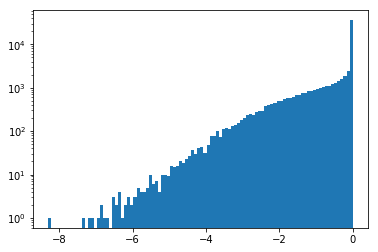

In [48]:
# .hist(bins = 100)
plt.hist(np.log10(table_pct['VART']).replace(-np.inf, np.nan).dropna().values, 100)
plt.yscale('log')
plt.show()

In [5]:
plt.hist(np.log10(firm_prod['pct']).replace(-np.inf, np.nan).dropna().values, 100)
plt.show()

NameError: name 'firm_prod' is not defined